In [1]:
import gseapy as gp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
module_data = pd.read_csv("Neutrophil_Modules.csv")
module_data.head()

,Gene,C,Z,Pval,FDR,Module
0,HBA1,0.173082,254.452287,0.0,0.0,-1.0
1,HBB,0.099660,194.191488,0.0,0.0,-1.0
2,HBA2,0.091684,185.590370,0.0,0.0,-1.0
3,AC090204.1,0.439853,161.050345,0.0,0.0,2.0
4,MTRNR2L1,0.484749,159.732279,0.0,0.0,2.0


In [16]:
enr = gp.enrichr(gene_list=module_data[module_data["Module"] == 1].Gene.tolist()[0:100],
                 gene_sets=["GO_Biological_Process_2023"],
                 organism="human",
                 outdir=None)
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Regulation Of Adipose Tissue Development (GO:1...,4/11,1.889787e-07,0.000214,0,0,118.410714,1833.191044,NCOA1;NCOA2;LCP1;SORL1
1,GO_Biological_Process_2023,Regulation Of Cellular Response To Insulin Sti...,3/6,2.399297e-06,0.001357,0,0,205.123711,2654.369515,NCOA1;NCOA2;ATP2B1
2,GO_Biological_Process_2023,Positive Regulation Of Adipose Tissue Developm...,3/7,4.183531e-06,0.001577,0,0,153.835052,1905.147874,NCOA1;NCOA2;SORL1
3,GO_Biological_Process_2023,Regulation Of Aspartic-Type Endopeptidase Acti...,3/8,6.669353e-06,0.001886,0,0,123.061856,1466.649674,LYN;SORL1;PICALM
4,GO_Biological_Process_2023,Protein Phosphorylation (GO:0006468),11/500,4.073921e-05,0.009215,0,0,4.906160,49.593035,SRPK2;LYN;USP15;PRKCB;LRRK2;STK17B;PKN2;RICTOR...


/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


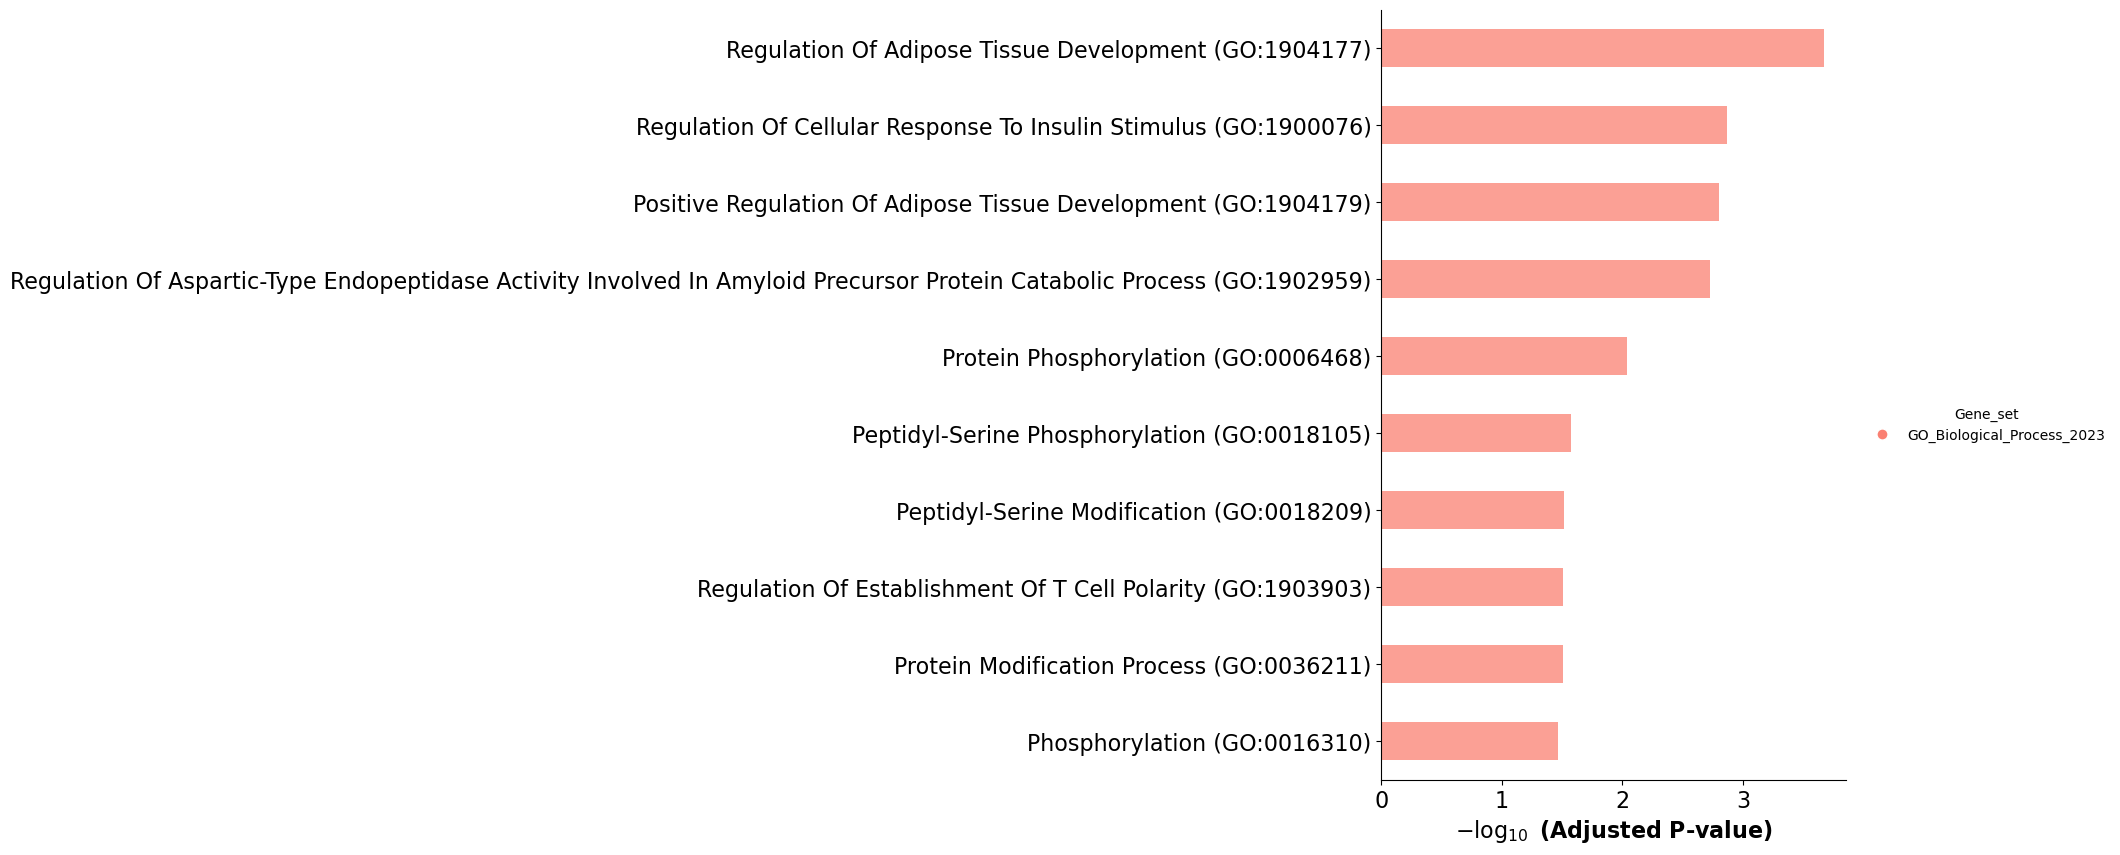

In [18]:
from gseapy import barplot, dotplot

ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(6, 10)
              #color=['darkred', 'darkblue', "pink"] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

In [3]:
enr = gp.enrichr(gene_list=module_data[module_data["Module"] == 3].Gene.tolist()[0:100],
                 gene_sets=["GO_Biological_Process_2023"],
                 organism="human",
                 outdir=None)
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Regulation Of DNA-templated Transcription (GO:...,25/1922,0.000006,0.005146,0,0,3.163416,37.963044,BNC2;LEF1;TCF7;TSHZ2;ATF7IP2;RORA;IKZF2;MLLT3;...
1,GO_Biological_Process_2023,Positive Regulation Of Nucleic Acid-Templated ...,12/557,0.000022,0.009166,0,0,4.842786,51.963936,SMAD3;MDFIC;ZBTB16;PYHIN1;CAMK4;LEF1;RORA;HIVE...
2,GO_Biological_Process_2023,Antigen Receptor-Mediated Signaling Pathway (G...,6/134,0.000058,0.016071,0,0,9.859707,96.261846,ITK;TXK;BCL2;FYN;CD247;SKAP1
3,GO_Biological_Process_2023,T Cell Receptor Signaling Pathway (GO:0050852),5/95,0.000115,0.022674,0,0,11.584795,105.115826,ITK;TXK;FYN;CD247;SKAP1
4,GO_Biological_Process_2023,Positive Regulation Of DNA-templated Transcrip...,17/1243,0.000135,0.022674,0,0,3.119735,27.790996,WWOX;SMAD3;BCL11B;ZBTB16;TXK;PYHIN1;LEF1;TCF12...


In [5]:
enr.results.to_csv("/mnt/c/Users/ouyangkang/Desktop/result.csv", index=None)

/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


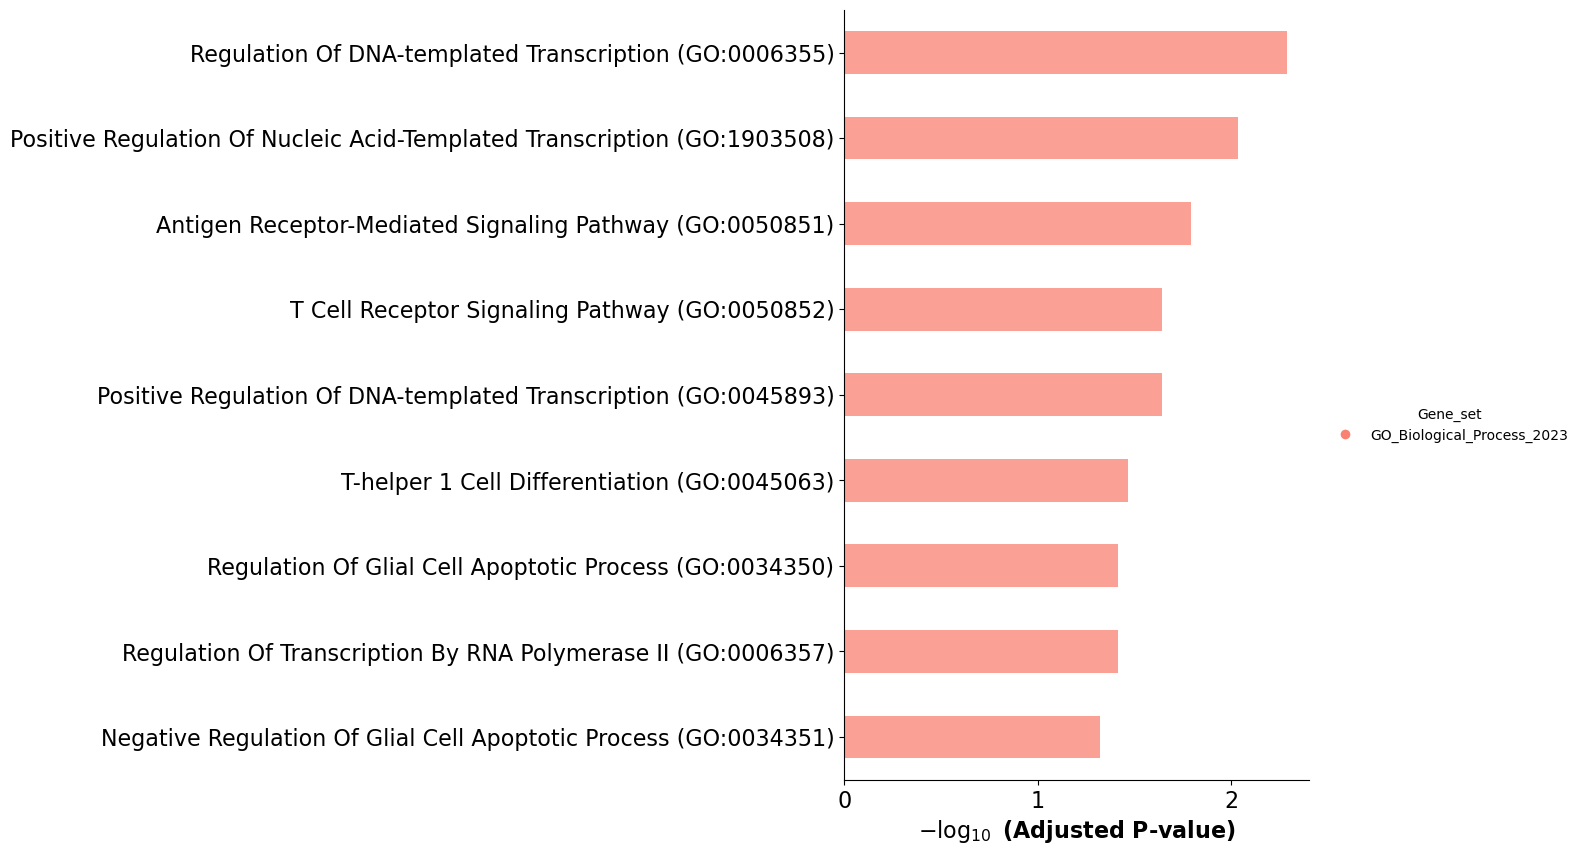

In [4]:
from gseapy import barplot, dotplot

ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=20,
              figsize=(6, 10)
              #color=['darkred', 'darkblue', "pink"] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

In [19]:
enr = gp.enrichr(gene_list=module_data[module_data["Module"] == 2].Gene.tolist()[0:100],
                 gene_sets=["GO_Biological_Process_2023"],
                 organism="human",
                 outdir=None)
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Negative Regulation Of Execution Phase Of Apop...,6/19,3.454338e-10,1.616630e-07,0,0,97.644845,2127.312075,MTRNR2L10;MTRNR2L11;MTRNR2L5;MTRNR2L7;MTRNR2L1...
1,GO_Biological_Process_2023,Regulation Of Execution Phase Of Apoptosis (GO...,6/24,1.679446e-09,3.929903e-07,0,0,70.503546,1424.510187,MTRNR2L10;MTRNR2L11;MTRNR2L5;MTRNR2L7;MTRNR2L1...
2,GO_Biological_Process_2023,Epithelial Tube Morphogenesis (GO:0060562),3/33,5.934099e-04,8.142752e-02,0,0,20.484536,152.192426,RYR2;COL4A1;GLI2
3,GO_Biological_Process_2023,Negative Regulation Of Apoptotic Process (GO:0...,9/482,6.959617e-04,8.142752e-02,0,0,4.062054,29.532011,MTRNR2L10;ERBB4;MTRNR2L11;HPN;MTRNR2L5;MTRNR2L...
4,GO_Biological_Process_2023,Basement Membrane Organization (GO:0071711),2/10,1.085038e-03,8.837445e-02,0,0,50.744898,346.391772,COL4A1;HPN


/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


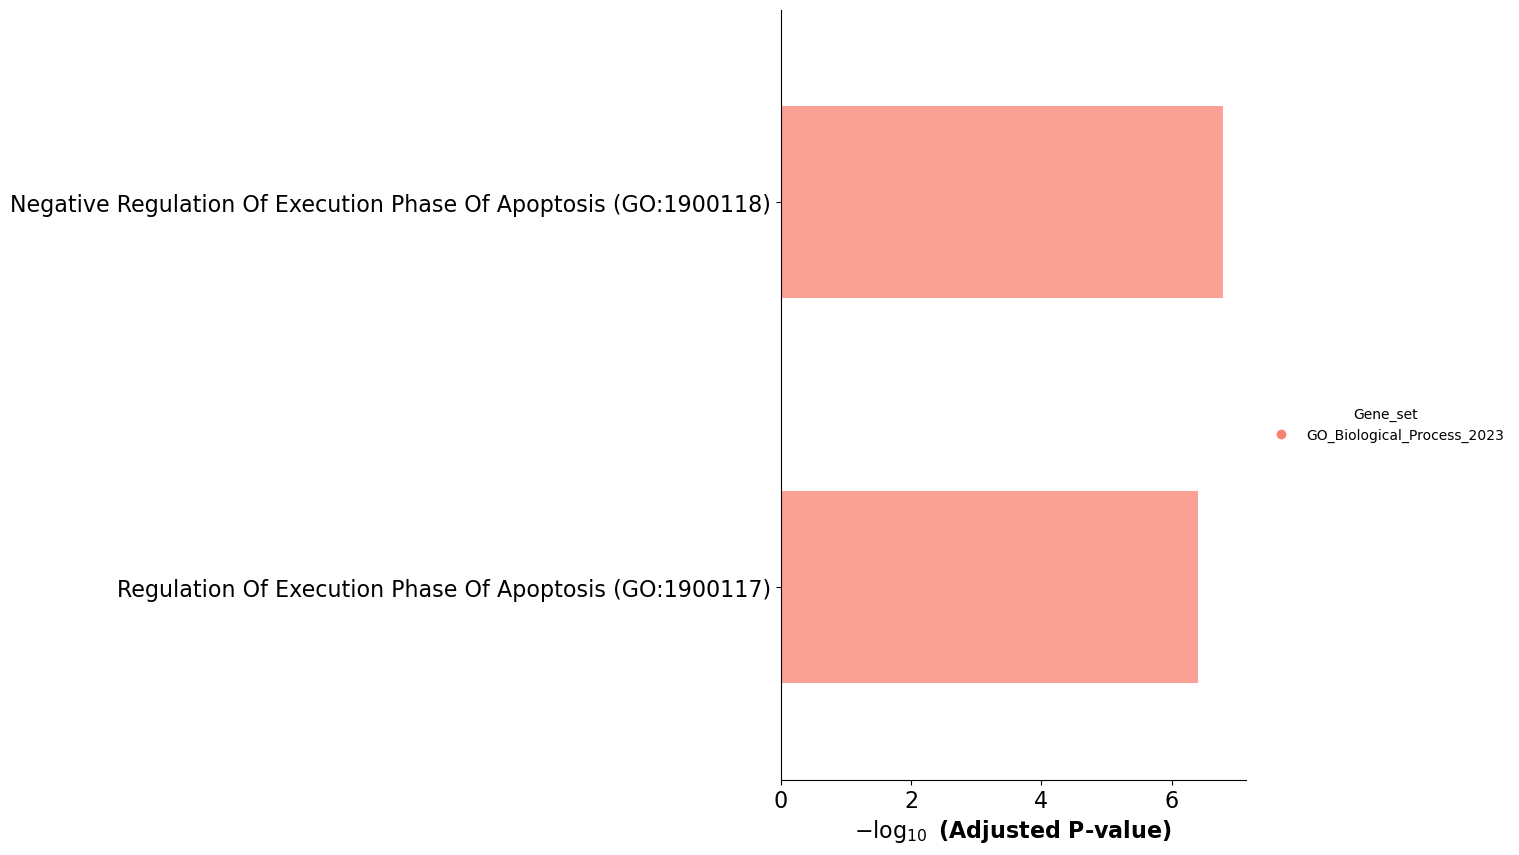

In [20]:
from gseapy import barplot, dotplot

ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=20,
              figsize=(6, 10)
              #color=['darkred', 'darkblue', "pink"] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

In [23]:
enr = gp.enrichr(gene_list=module_data[module_data["Module"] == 4].Gene.tolist()[0:50],
                 gene_sets=["GO_Biological_Process_2023"],
                 organism="human",
                 outdir=None)
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Regulation Of Small GTPase Mediated Signal Tra...,5/118,0.000011,0.004118,0,0,19.505408,222.265420,ARHGAP30;ARHGEF1;MYO9B;ARAP1;SRGAP3
1,GO_Biological_Process_2023,Regulation Of Intracellular Signal Transductio...,5/297,0.000856,0.119586,0,0,7.480213,52.831702,ARHGAP30;ARHGEF1;MYO9B;ARAP1;SRGAP3
2,GO_Biological_Process_2023,Regulation Of Innate Immune Response (GO:0045088),3/78,0.000980,0.119586,0,0,16.914894,117.181979,FGR;IRF1;PTPN6
3,GO_Biological_Process_2023,Negative Regulation Of Inflammatory Response (...,3/111,0.002698,0.173504,0,0,11.726950,69.369801,FGR;PTPN6;TNFRSF1B
4,GO_Biological_Process_2023,Regulation Of Response To Biotic Stimulus (GO:...,2/31,0.002719,0.173504,0,0,28.622126,169.082267,FGR;IRF1


/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


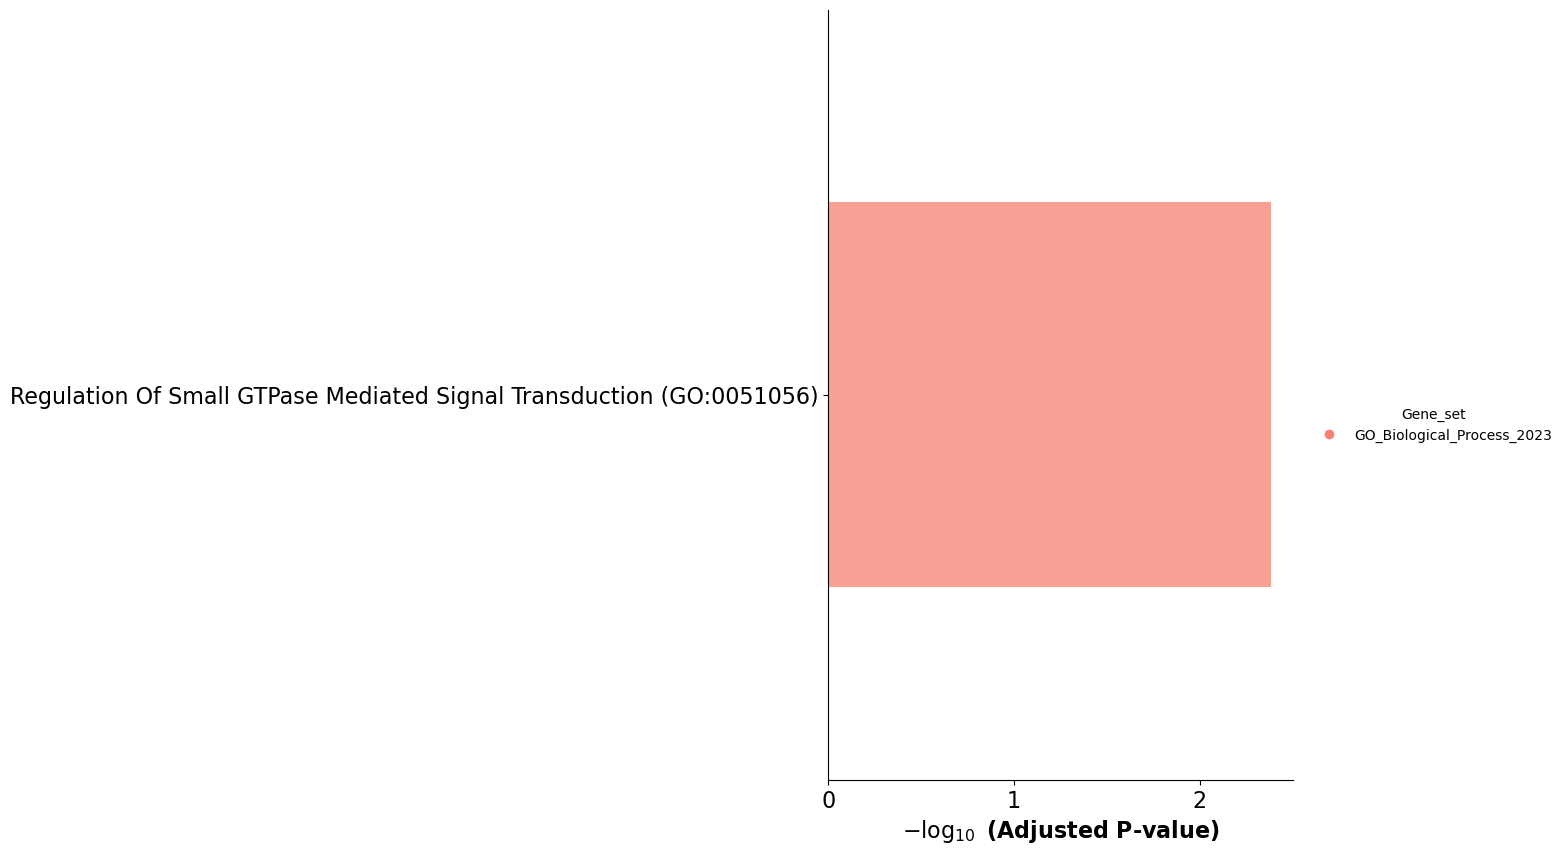

In [24]:
from gseapy import barplot, dotplot

ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=20,
              figsize=(6, 10)
              #color=['darkred', 'darkblue', "pink"] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

In [26]:
marker_gene = pd.read_csv("0703_Neutrophils_subtype_markers.csv")
marker_gene.head()

,0,1,2,3,4
0,NAMPT,MT-RNR2,AL928646.1,SKAP1,AC090204.1
1,SMCHD1,MT-RNR1,HFM1,TNIK,MTRNR2L1
2,ARHGAP26,SKAP1,EYA4,XIST,MTRNR2L5
3,NEAT1,PRKCH,SRGAP3,PRKCH,FP236383.1
4,LRRK2,LRBA,IL1B,KLF12,MTRNR2L10


In [28]:
enr = gp.enrichr(gene_list=marker_gene["0"].tolist()[0:100],
                 gene_sets=["GO_Biological_Process_2023"],
                 organism="human",
                 outdir=None)
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Regulation Of Adipose Tissue Development (GO:1...,4/11,1.889787e-07,0.000214,0,0,118.410714,1833.191044,NCOA1;NCOA2;LCP1;SORL1
1,GO_Biological_Process_2023,Regulation Of Cellular Response To Insulin Sti...,3/6,2.399297e-06,0.001359,0,0,205.123711,2654.369515,NCOA1;NCOA2;ATP2B1
2,GO_Biological_Process_2023,Positive Regulation Of Adipose Tissue Developm...,3/7,4.183531e-06,0.001580,0,0,153.835052,1905.147874,NCOA1;NCOA2;SORL1
3,GO_Biological_Process_2023,Regulation Of Aspartic-Type Endopeptidase Acti...,3/8,6.669353e-06,0.001889,0,0,123.061856,1466.649674,LYN;SORL1;PICALM
4,GO_Biological_Process_2023,Regulation Of Intracellular Signal Transductio...,9/297,1.815028e-05,0.004113,0,0,6.734890,73.523615,LYN;PREX1;DOCK8;LRRK2;RICTOR;ARHGAP26;ARHGAP15...


/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


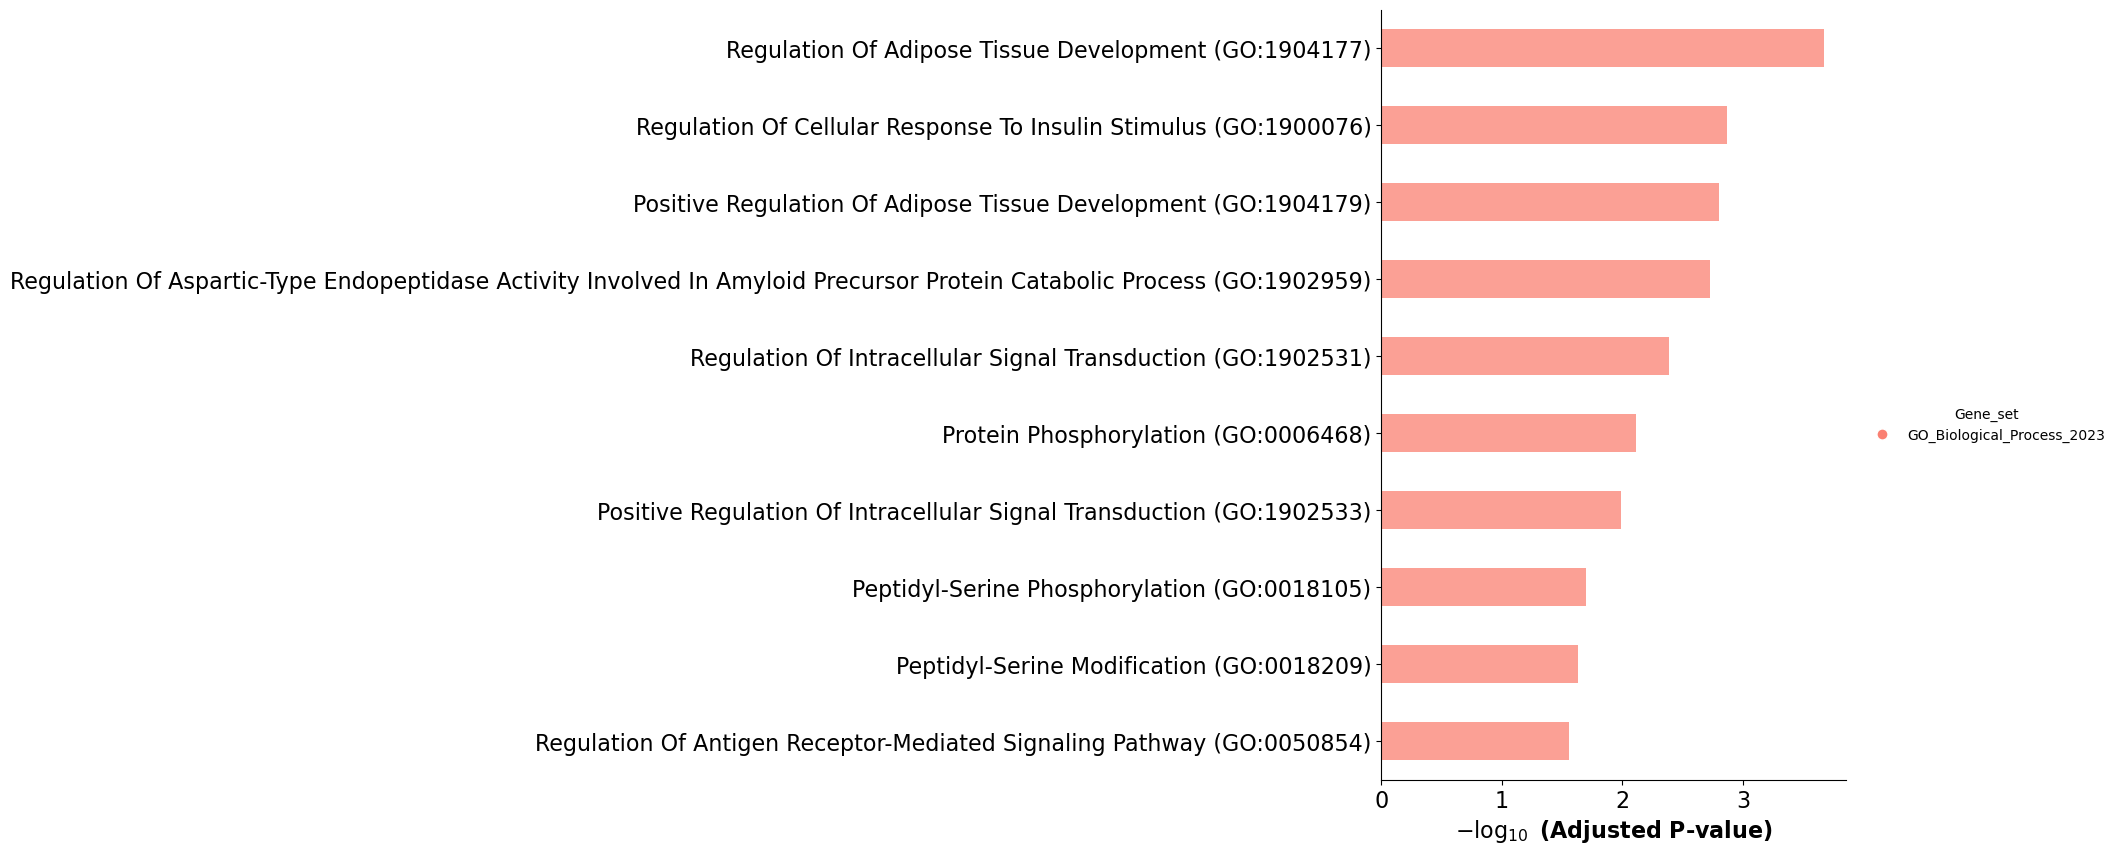

In [30]:
from gseapy import barplot, dotplot

ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(6, 10)
              #color=['darkred', 'darkblue', "pink"] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

In [31]:
enr = gp.enrichr(gene_list=marker_gene["1"].tolist()[0:100],
                 gene_sets=["GO_Biological_Process_2023"],
                 organism="human",
                 outdir=None)
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Positive Regulation Of Nucleic Acid-Templated ...,13/557,0.000004,0.003831,0,0,5.316684,65.960449,PYHIN1;LEF1;RORA;MLLT3;ETS1;ARID1B;RUNX1;RXRA;...
1,GO_Biological_Process_2023,Regulation Of Cell-Matrix Adhesion (GO:0001952),5/65,0.000018,0.008610,0,0,17.403509,189.755264,MACF1;CASK;FYN;UTRN;SKAP1
2,GO_Biological_Process_2023,Positive Regulation Of DNA-templated Transcrip...,18/1243,0.000040,0.012453,0,0,3.346441,33.895304,WWOX;BCL11B;PYHIN1;LEF1;TCF12;RORA;MLLT3;ETS1;...
3,GO_Biological_Process_2023,Peptidyl-Serine Phosphorylation (GO:0018105),6/158,0.000143,0.028675,0,0,8.292833,73.420201,CAMK2D;PRKCH;CAMK4;STK39;PRKCA;ATM
4,GO_Biological_Process_2023,Protein Autophosphorylation (GO:0046777),6/162,0.000164,0.028675,0,0,8.078560,70.421445,CAMK2D;CAMK4;STK39;ATM;FYN;TNIK


/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


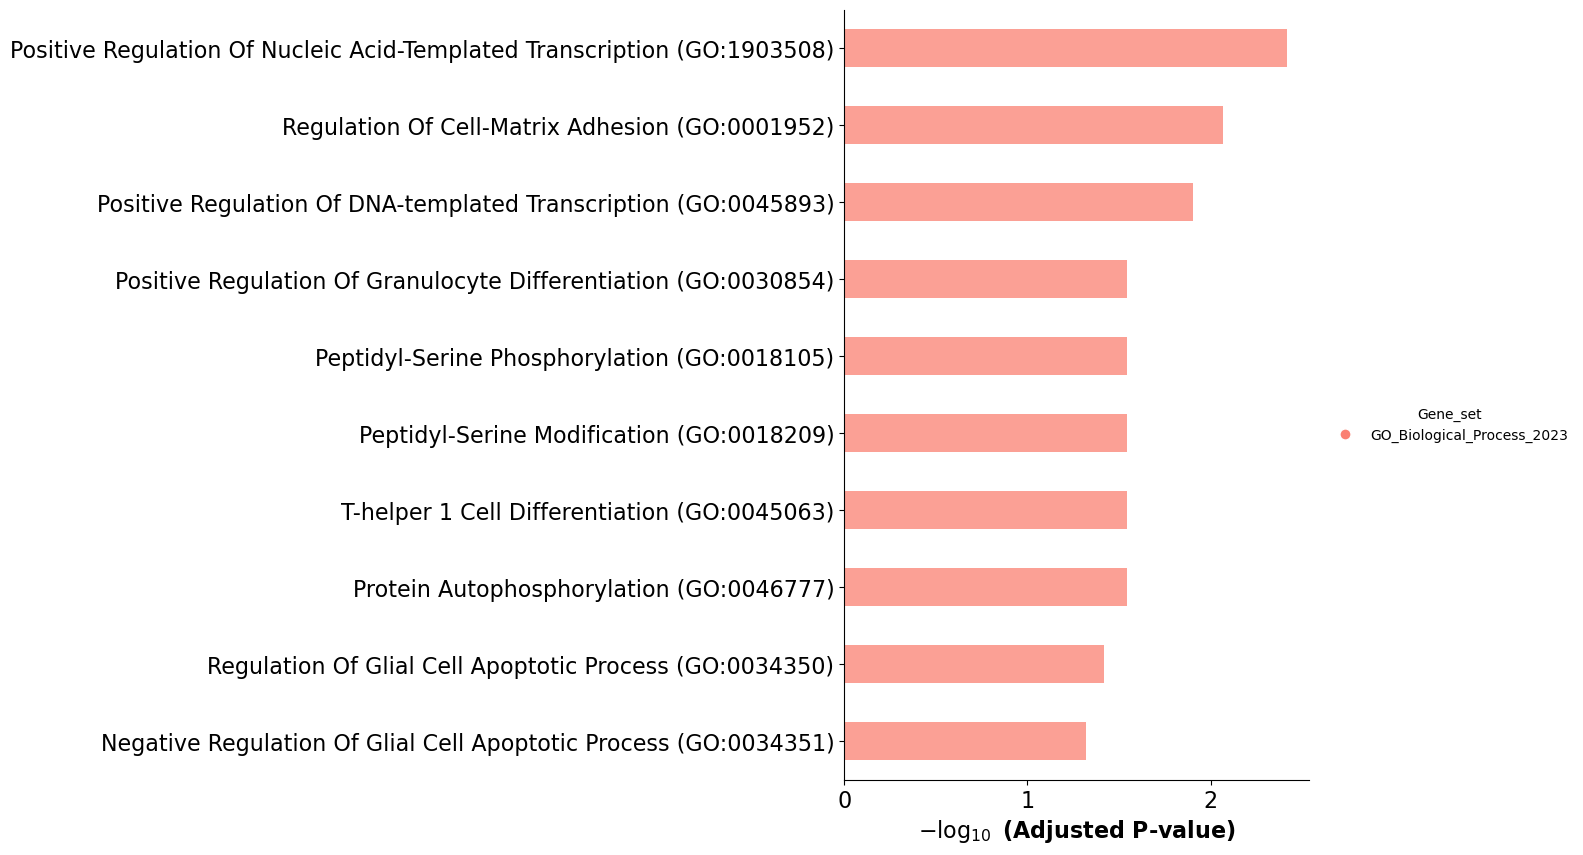

In [32]:
from gseapy import barplot, dotplot

ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(6, 10)
              #color=['darkred', 'darkblue', "pink"] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

In [33]:
enr = gp.enrichr(gene_list=marker_gene["2"].tolist()[0:100],
                 gene_sets=["GO_Biological_Process_2023"],
                 organism="human",
                 outdir=None)
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Negative Regulation Of Extrinsic Apoptotic Sig...,3/22,0.000174,0.04727,0,0,32.361910,280.081821,MAPK7;IL1B;EYA4
1,GO_Biological_Process_2023,Negative Regulation Of Signal Transduction In ...,3/22,0.000174,0.04727,0,0,32.361910,280.081821,MAPK7;IL1B;EYA4
2,GO_Biological_Process_2023,Regulation Of Heterotypic Cell-Cell Adhesion (...,3/24,0.000227,0.04727,0,0,29.276878,245.593184,MAPK7;CEACAM6;IL1B
3,GO_Biological_Process_2023,Regulation Of Extrinsic Apoptotic Signaling Pa...,3/27,0.000325,0.04727,0,0,25.613402,205.708988,MAPK7;IL1B;EYA4
4,GO_Biological_Process_2023,Regulation Of Cell Adhesion Molecule Productio...,2/6,0.000366,0.04727,0,0,101.510204,803.117991,FUT7;IL1B


/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


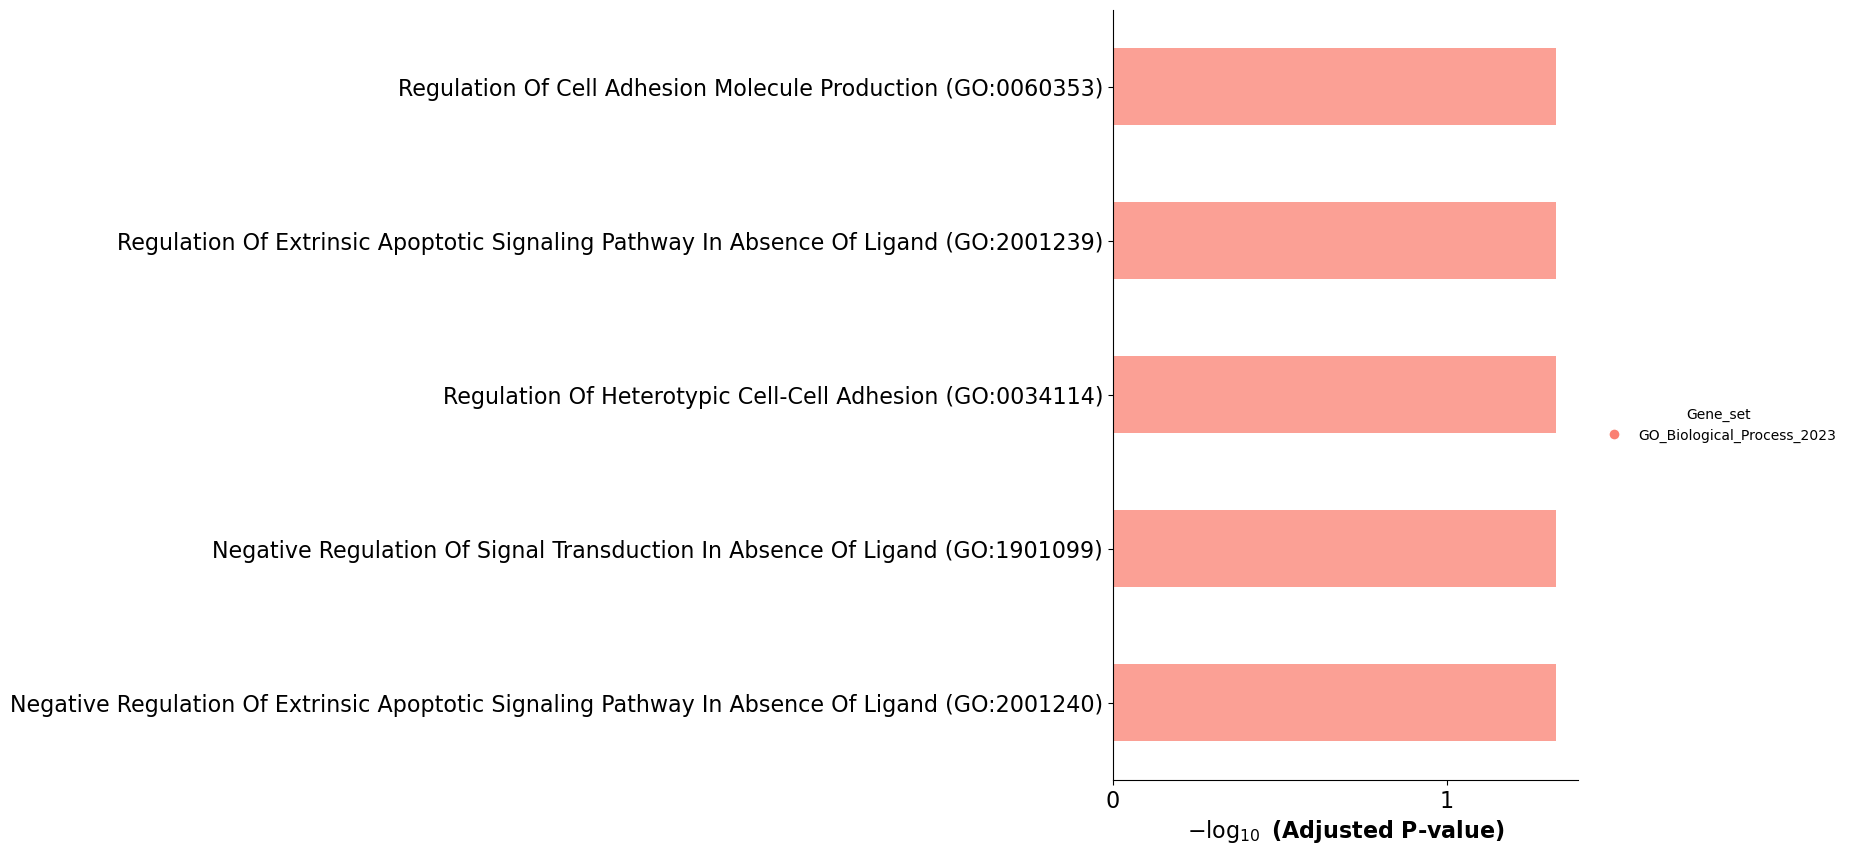

In [34]:
from gseapy import barplot, dotplot

ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(6, 10)
              #color=['darkred', 'darkblue', "pink"] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

In [35]:
enr = gp.enrichr(gene_list=marker_gene["3"].tolist()[0:100],
                 gene_sets=["GO_Biological_Process_2023"],
                 organism="human",
                 outdir=None)
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Antigen Receptor-Mediated Signaling Pathway (G...,8/134,3.649259e-07,0.000325,0,0,13.646653,202.292135,ITK;TXK;RFTN1;BCL2;NFATC2;FYN;CD247;SKAP1
1,GO_Biological_Process_2023,Regulation Of DNA-templated Transcription (GO:...,26/1922,1.828408e-06,0.000815,0,0,3.336355,44.080144,CAMK2D;LEF1;TSHZ2;ATF7IP2;RORA;MLLT3;ETS1;NR3C...
2,GO_Biological_Process_2023,Positive Regulation Of Nucleic Acid-Templated ...,13/557,4.092664e-06,0.001216,0,0,5.316684,65.960449,SMAD3;PYHIN1;LEF1;NFATC2;RORA;MLLT3;ETS1;SUPT3...
3,GO_Biological_Process_2023,T Cell Receptor Signaling Pathway (GO:0050852),6/95,8.147758e-06,0.001815,0,0,14.208224,166.488667,ITK;TXK;RFTN1;FYN;CD247;SKAP1
4,GO_Biological_Process_2023,Peptidyl-Serine Phosphorylation (GO:0018105),7/158,1.454193e-05,0.002591,0,0,9.844264,109.650083,CAMK2D;PRKCH;CAMK4;STK39;PRKCA;PRKCQ;PRKACB


/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


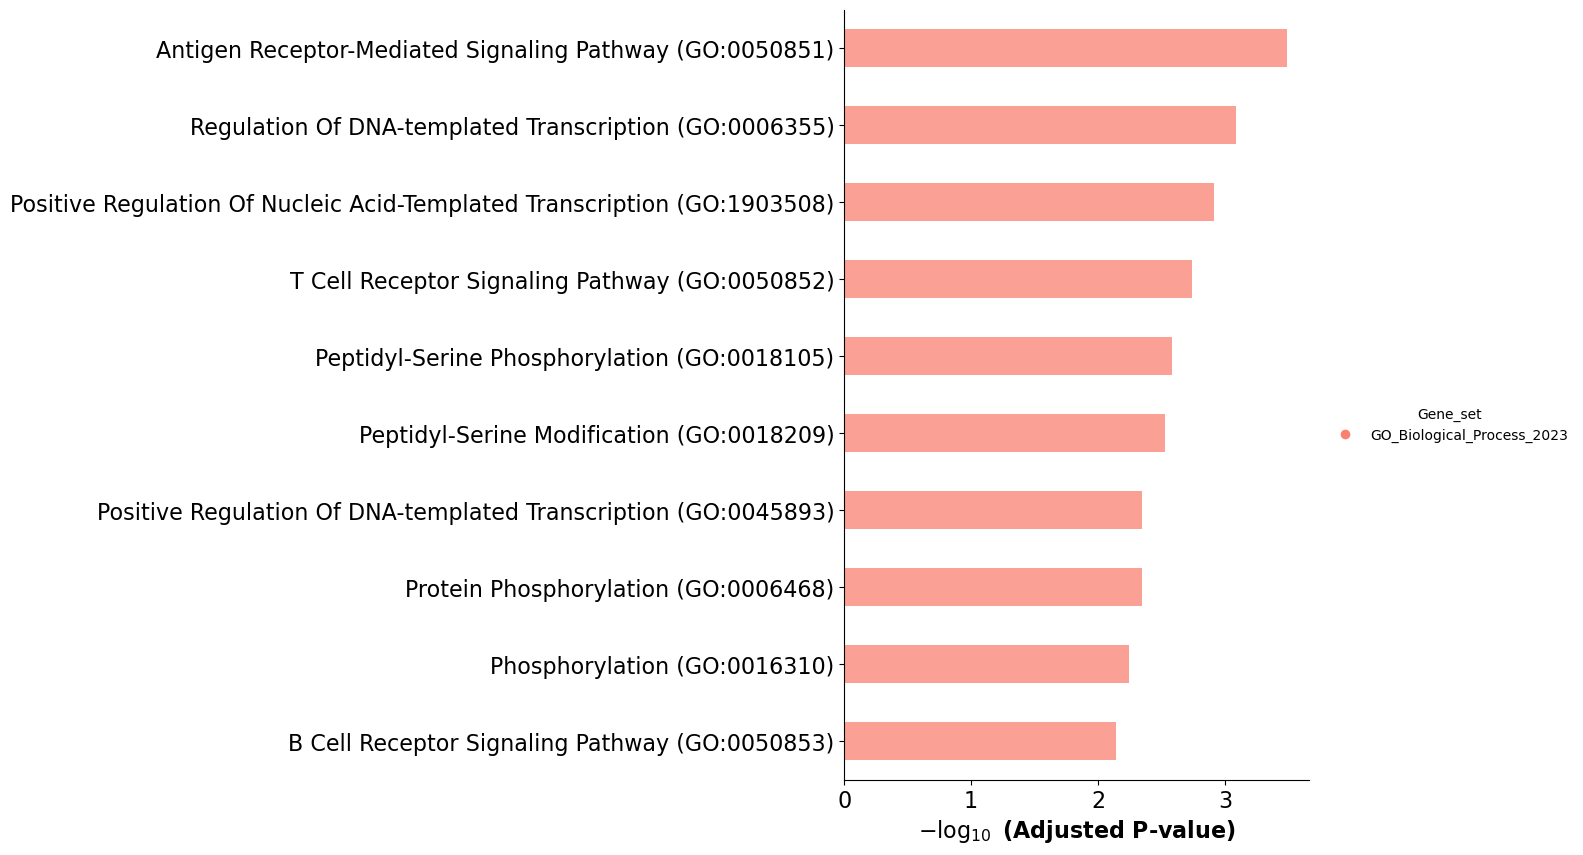

In [36]:
from gseapy import barplot, dotplot

ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(6, 10)
              #color=['darkred', 'darkblue', "pink"] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )


In [37]:
enr = gp.enrichr(gene_list=marker_gene["4"].tolist()[0:100],
                 gene_sets=["GO_Biological_Process_2023"],
                 organism="human",
                 outdir=None)
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Negative Regulation Of Execution Phase Of Apop...,8/19,2.119525e-14,1.426440e-11,0,0,157.225296,4950.238358,MTRNR2L10;MTRNR2L11;MTRNR2L12;MTRNR2L5;MTRNR2L...
1,GO_Biological_Process_2023,Regulation Of Execution Phase Of Apoptosis (GO...,8/24,2.020757e-13,6.799846e-11,0,0,108.065217,3158.760811,MTRNR2L10;MTRNR2L11;MTRNR2L12;MTRNR2L5;MTRNR2L...
2,GO_Biological_Process_2023,Negative Regulation Of Apoptotic Process (GO:0...,10/482,1.501191e-04,3.367671e-02,0,0,4.573446,40.264996,MTRNR2L10;RPS6KB1;ERBB4;MTRNR2L11;MTRNR2L12;MT...
3,GO_Biological_Process_2023,Neuron Remodeling (GO:0016322),2/9,8.708672e-04,1.465234e-01,0,0,57.997085,408.648680,APP;ANKS1A
4,GO_Biological_Process_2023,Cellular Response To Transforming Growth Facto...,4/96,1.374495e-03,1.773406e-01,0,0,8.971014,59.116016,COL3A1;COL1A2;USP9Y;PDE3A


/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/ouyangkang/software/miniconda3/envs/sc/lib/python3.11/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


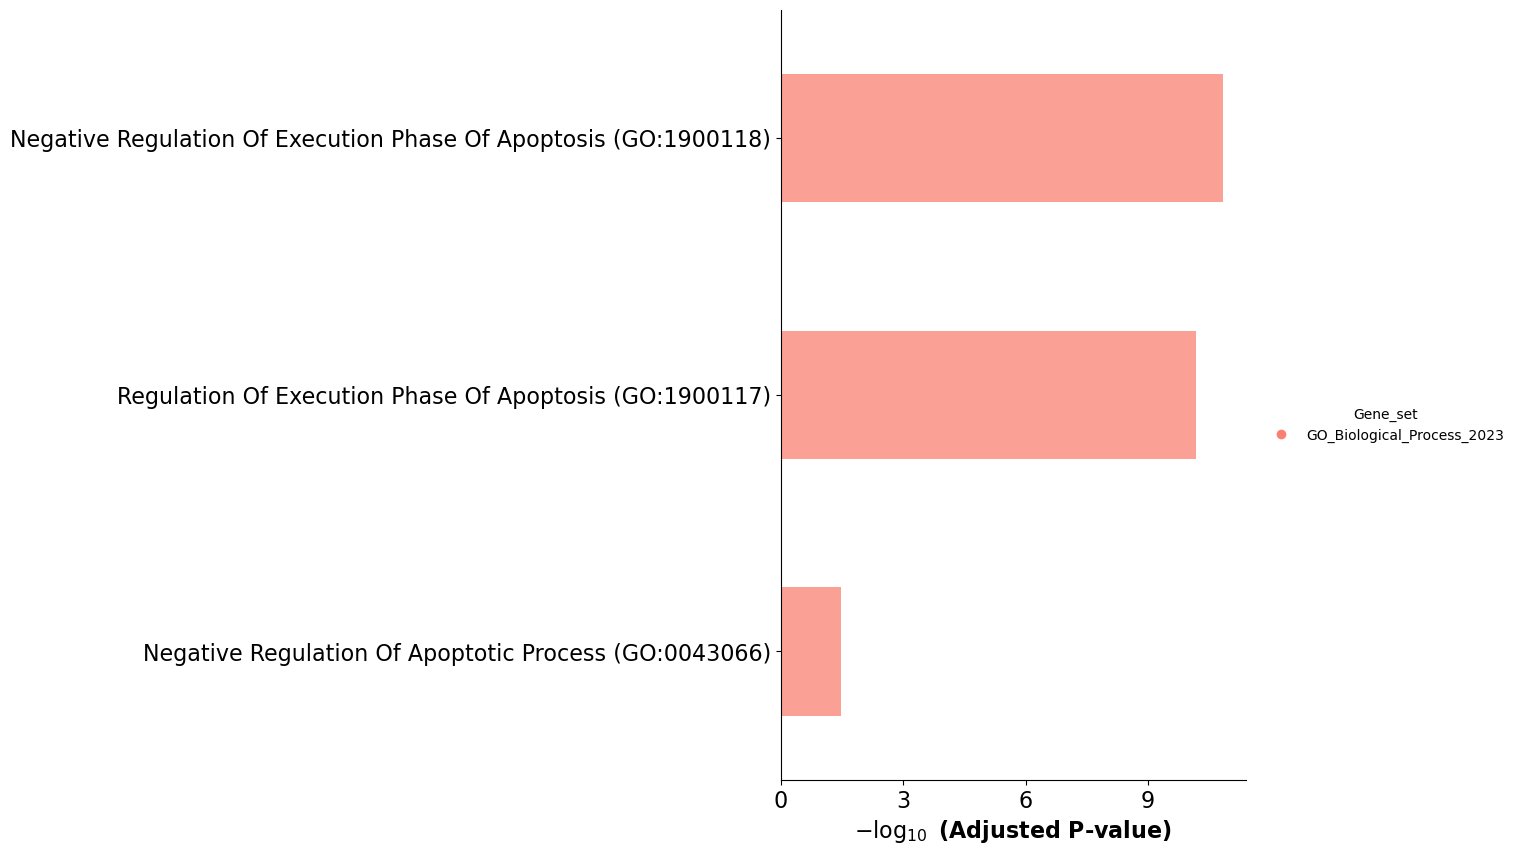

In [38]:
from gseapy import barplot, dotplot

ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(6, 10)
              #color=['darkred', 'darkblue', "pink"] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )